# Draft analysis 

---

Group name: E 

---


## Introduction

Durch die Digitalisierung der Versicherungsbranche wurde eine neue Norm gesetzt, die es ermöglichte besser auf die Bedürfnisse der Kunden einzugehen. Die Versicherungen stellten sich damit einer bereits bekannten Herausforderung, dem Versicherungsbetrug. Jede zehnte Schadensmeldung ist betrugsverdächtig und kostet den deutschen Versicherungen rund fünf Milliarden Euro pro Jahr (GDV, 2020). Um Versicherungsbetrug zu erkennen, wird spezielle Betrugserkennungssoftware verwendet. Hierbei nutzen Versicherungsbetrüger zunehmend Anleitungen aus dem Internet, die es erleichtern die Betrugserkennungssoftware zu umgehen (GDV, 2020). 

*Quelle: https://www.gdv.de/gdv/medien/medieninformationen/sorge-der-versicherer-corona-gibt-betruegern-auftrieb-61842*

Mit diesem Datensatz untersuchen wir, ob und welche Maßnahmen nötig sind, um den Prozess der Erkennung von Versicherungsbetrug zu verbessern. 

### Forschungsfrage

Wie können Betrugsfälle von der Betrugserkennungssoftware und Mitarbeitern besser erkannt werden? Welche Maßnahmen sind dazu nötig?

Wir haben folgende Hypothesen:

1. Unter 35 jährige Versicherungskunden betrügen öfters.

2. Männer betrügen häufiger als Frauen.

3. Personen mit einem niedrigem Bildungsabschluss betrügen häufiger.

4. Schadensfälle ohne polizeilicher Dokumentation sind häufiger Betrugsfälle.

5. Schadensfälle mit mehreren beteiligten Fahrzeugen sind weniger in Betrugsfälle verwickelt.


### Data Dictionary

Description of the relevant variables

- CustomerID: Die eindeutige Kundenidentifikationsnummer eines Kunden. <br>
- InsuredAge: Das Alter eines Kunden.<br>
- InsuredGender: Das Geschlecht eines Kunden.<br>
- InsuredEducationLevel: Der höchste Bildungsabschluss eines Kunden.<br>
- CustomerLoyaltyPeriod: Die Dauer der Mitgledschaft (Tage) eines Kunden.<br>
- TypeOfIncident: Die Art des Unfalls.<br>
- AuthorotiesContacted: Wurden Behörden (Polizei, Krankenwagen, Feuerwehr, Andere) kontaktiert.<br>
- ReportedFraud: Wurde als Betrugsfall (Ja, Nein) gemeldet.<br>

<br>


| Name  |    Type 	  
|---	|---	          	|
| CustomerID  	|   	nominal            |
| TypeOfIncident  	|   	nominal       	    |
| AuthoritiesContacted  	|   nominal	       	    |
| InsuredAge  	|   ordinal	       	    |
| InsuredGender  	|   nominal	       	    |
| InsuredEducationLevel  	|   ordinal	       	    |
| CustomerLoyaltyPeriod  	|   	ordinal       	    |
| ReportedFraud  	|   	 nominal      	    | 


<br>

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CustomerID             28836 non-null  object  
 1   TypeOfIncident         28836 non-null  category
 2   AuthoritiesContacted   28836 non-null  category
 3   InsuredAge             28836 non-null  int64   
 4   InsuredGender          28806 non-null  category
 5   InsuredEducationLevel  28836 non-null  category
 6   CustomerLoyaltyPeriod  28836 non-null  int64   
 7   ReportedFraud          28836 non-null  object  
 8   is_over_35             28836 non-null  object  
dtypes: category(4), int64(2), object(3)
memory usage: 1.2+ MB


## Setup

In [199]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

## Import data

In [200]:
ROOT= "https://raw.githubusercontent.com/christophersegatz/dst-project/main/data/insurance_fraud/"
DATA = "fraud.csv"

df=pd.read_csv(ROOT + DATA)


### Data structure

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            28836 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  int64  
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              28836 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

### Data corrections

In [202]:
# Nicht benötigte Tabellen aus dem Dataframe entfernen
df.drop(["DateOfIncident","TypeOfCollission", "SeverityOfIncident", "IncidentState", "IncidentCity", "IncidentAddress", "IncidentTime",
         "NumberOfVehicles", "PropertyDamage", "BodilyInjuries", "Witnesses", "PoliceReport", "AmountOfTotalClaim", "AmountOfInjuryClaim",
        "AmountOfPropertyClaim", "AmountOfVehicleDamage", "InsuredZipCode", "InsuredOccupation", "InsuredHobbies",
        "CapitalGains", "CapitalLoss", "Country", "InsurancePolicyNumber", "DateOfPolicyCoverage", "InsurancePolicyState", "Policy_CombinedSingleLimit",
        "Policy_Deductible", "PolicyAnnualPremium", "UmbrellaLimit", "InsuredRelationship"], axis= 1, inplace=True)

In [203]:
# Als kategoriale Variablen abändern
df = df.astype(
    {
        "TypeOfIncident": "category",
        "AuthoritiesContacted": "category",
        "InsuredGender": "category",
        "InsuredEducationLevel": "category"
})

## Analysis

### Descriptive statistics

In [206]:
df.head()

,CustomerID,TypeOfIncident,AuthoritiesContacted,InsuredAge,InsuredGender,InsuredEducationLevel,CustomerLoyaltyPeriod,ReportedFraud
0,Cust10000,Multi-vehicle Collision,Police,35,MALE,JD,49,N
1,Cust10001,Multi-vehicle Collision,Police,36,MALE,JD,114,N
2,Cust10002,Single Vehicle Collision,Other,33,MALE,JD,167,N
3,Cust10003,Single Vehicle Collision,Other,36,MALE,JD,190,N
4,Cust10004,Single Vehicle Collision,Fire,29,FEMALE,High School,115,N


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CustomerID             28836 non-null  object  
 1   TypeOfIncident         28836 non-null  category
 2   AuthoritiesContacted   28836 non-null  category
 3   InsuredAge             28836 non-null  int64   
 4   InsuredGender          28806 non-null  category
 5   InsuredEducationLevel  28836 non-null  category
 6   CustomerLoyaltyPeriod  28836 non-null  int64   
 7   ReportedFraud          28836 non-null  object  
dtypes: category(4), int64(2), object(2)
memory usage: 1014.8+ KB


In [ ]:
alt.data_transformers.disable_max_rows()

# make a list of variables you want to use
var_list = ['InsuredAge']

# create a new dataframe called source with only var_list
source = df[var_list]

alt.Chart(source).mark_bar().encode(
    alt.X("InsuredAge", bin=True),
    y='count()',
)

c:\Users\murad\anaconda3\envs\dst\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [ ]:
# make a list of variables you want to use
var_list2 = ['InsuredGender']

# create a new dataframe called source with only var_list
source2 = df[var_list2]

source2['InsuredGender'].cat.categories
source2['InsuredGender'].value_counts()

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64

In [208]:
# make a list of variables you want to use
var_list = ['TypeOfIncident']

# create a new dataframe called source with only var_list
source = df[var_list]

source['TypeOfIncident'].cat.categories
source['TypeOfIncident'].value_counts()


Multi-vehicle Collision     11966
Single Vehicle Collision    11677
Vehicle Theft                2685
Parked Car                   2508
Name: TypeOfIncident, dtype: int64

In [209]:
# make a list of variables you want to use
var_list = ['AuthoritiesContacted']

# create a new dataframe called source with only var_list
source = df[var_list]

source['AuthoritiesContacted'].cat.categories
source['AuthoritiesContacted'].value_counts()

Police       8324
Fire         6518
Ambulance    5732
Other        5570
None         2692
Name: AuthoritiesContacted, dtype: int64

In [212]:
# make a list of variables you want to use
var_list = ['InsuredEducationLevel']

# create a new dataframe called source with only var_list
source = df[var_list]

source['InsuredEducationLevel'].cat.categories
source['InsuredEducationLevel'].value_counts()

JD             4808
High School    4583
MD             4161
Masters        4141
Associate      4125
PhD            3556
College        3462
Name: InsuredEducationLevel, dtype: int64

### Exploratory data analysis

H1: Unter 35 jährige Versicherungskunden betrügen öfters.

In [213]:

df['is_over_35'] = np.where(df['InsuredAge']>=35, 'yes', 'no')

pd.crosstab(index=df['is_over_35'], 
            columns=df['ReportedFraud'],
            normalize='index').round(4) * 100

ReportedFraud,N,Y
is_over_35,,
no,72.4,27.6
yes,73.3,26.7


Kunden unter 35 Jahren betrügen häufiger allerdings nur um 0.9 Prozentpunkte.

H2: Männer betrügen häufiger als Frauen.

In [214]:
pd.crosstab(index=df['InsuredGender'], 
            columns=df['ReportedFraud'],
            normalize='index').round(4) * 100

ReportedFraud,N,Y
InsuredGender,,
FEMALE,74.03,25.97
MALE,71.75,28.25


Bei den Männern betrügen 28.25% - bei den Frauen 25.97%.

H3: Personen mit einem niedrigem Bildungsabschluss betrügen häufiger.

In [215]:
pd.crosstab(index=df['InsuredEducationLevel'], 
            columns=df['ReportedFraud'],
            normalize='index').round(4) * 100

ReportedFraud,N,Y
InsuredEducationLevel,,
Associate,74.45,25.55
College,70.45,29.55
High School,73.99,26.01
JD,74.29,25.71
MD,72.27,27.73
Masters,74.55,25.45
PhD,69.85,30.15


Der höchste Bildungsabschluss -PhD hat mit 30.15% die höchste Betrugsrate. Der niedrigste Bildungsabschlus - Associate hat mit 25.55% die zweitniedrigste Betrugsrate.

H4: Schadensfälle ohne polizeilicher Dokumentation sind häufiger Betrugsfälle.

In [216]:
pd.crosstab(index=df['AuthoritiesContacted'], 
            columns=df['ReportedFraud'],
            normalize='index').round(4) * 100

ReportedFraud,N,Y
AuthoritiesContacted,,
Ambulance,69.28,30.72
Fire,70.60,29.40
None,90.12,9.88
Other,67.58,32.42
Police,75.54,24.46


Wurde keine Authority kontaktiert ist die Betrugsrtate mit 9.88% am geringsten. Wurde die Polizei kontaktiert ist die Betrugsrate mit 24.46% am 2. höchsten. 

H5: Schadensfälle mit mehreren beteiligten Fahrzeugen sind weniger in Betrugsfälle verwickelt.

In [217]:
pd.crosstab(index=df['TypeOfIncident'], 
            columns=df['ReportedFraud'],
            normalize='index').round(4) * 100

ReportedFraud,N,Y
TypeOfIncident,,
Multi-vehicle Collision,70.75,29.25
Parked Car,87.88,12.12
Single Vehicle Collision,68.96,31.04
Vehicle Theft,86.74,13.26


Die Hypothese kann nicht angenommen werden. Unfälle aus der Kategorie Parked Car und Vehicle Theft haben die geringste Betrugsrate. 

## Visualizations

### Visualization ideas

H2: Männer betrügen häufiger als Frauen.

<AxesSubplot: xlabel='InsuredGender', ylabel='Prozent'>

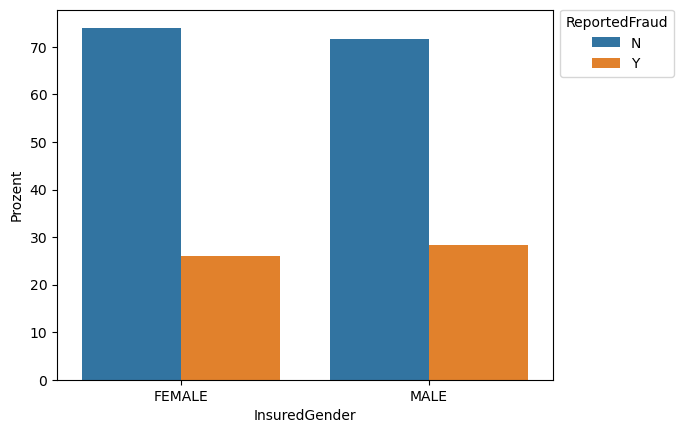

In [294]:
chart_h2 = pd.crosstab(df.ReportedFraud, df.InsuredGender, 
                        normalize="columns" ).round(4)*100

stacked = chart_h2.stack().reset_index().rename(columns={0:'Prozent'})

chart_h2 = sns.barplot(x=stacked.InsuredGender, y=stacked.Prozent, hue=stacked.ReportedFraud)
sns.move_legend(chart_h2, bbox_to_anchor=(1, 1.02), loc='upper left')

chart_h2



### Save Visualizations



Save your draft visualizations in the folder `reports/visualizations/`. Use a meaningful name (always include the word `draft` and a `timestamp`in your filename).

## Conclusion and recommended action